In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import PIL
from PIL import Image
from matplotlib.pyplot import imshow, figure

In [ ]:
img14=cv2.imread('F:\\SIH20\\cloud\\INSAT3D_TIR1_India\\3DIMG_07NOV2019_0000_L1C_SGP.tif',-1).astype(np.float32)
imgnew=cv2.imread('3DIMG_01JUN2020_0000_L1C_SGP_IMG_TIR1.tif',-1).astype(np.float32)/255
img = Image.open('3DIMG_01JUN2020_0000_L1C_SGP_IMG_TIR1.tif')
img=np.array(img)
print(img14.shape)
print(img.shape)
img.resize(3200, 3000, Image.ANTIALIAS)
img =np.reshape(img, (3200, 3000, 1))
figure()
imshow(img14,cmap='gray')
#figure()
#imshow(img[:,:,0],cmap='gray')

In [22]:
def draw_hsv(flow):
        h, w = flow.shape[:2]
        fx, fy = flow[:,:,0], flow[:,:,1]
        ang = np.arctan2(fy, fx) + np.pi
        v = np.sqrt(fx*fx+fy*fy)
        hsv = np.zeros((h, w, 3), np.uint8)
        hsv[...,0] = ang*(180/np.pi/2)
        hsv[...,1] = 255
        hsv[...,2] = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        return bgr

    

In [ ]:
# here I am calculating flow from the first 44 images

In [23]:
def warp_flow(img, flow):
        h, w = flow.shape[:2]
        flow = -flow
        flow[:,:,0] += np.arange(w)
        flow[:,:,1] += np.arange(h)[:,np.newaxis]
        res = cv2.remap(img, flow, None, cv2.INTER_LINEAR)
        return res

In [3]:
import os

L=os.listdir('F:\\SIH20\\cloud\\INSAT3D_TIR1_India')
L2=os.listdir('F:\\SIH20\\cloud\\INSAT3D_VIS_India')

#print(L2)

In [14]:
import cv2
import numpy as np
from imageio import imread

t='F:'+'\\'+'SIH20'+'\\'+'cloud'+'\\'+'INSAT3D_TIR1_India'+'\\'+L[0]
t=cv2.imread(t,-1).astype(np.float32)/255
t=cv2.cvtColor(t,cv2.COLOR_BGR2RGB)
t=cv2.cvtColor(t,cv2.COLOR_RGB2GRAY)
min1=np.amin(t)
max1=np.amax(t)
num1=(t-min1)*255
den1=(max1-min1)
t=num1/den1
t = np.asarray(t)
im1=t
for i in L[1:43]:
    nn='F:'+'\\'+'SIH20'+'\\'+'cloud'+'\\'+'INSAT3D_TIR1_India'+'\\'+i
    im=cv2.imread(nn,-1)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
####################################### converting pixal in the range 0 to 255 #########################################  
    min1=np.amin(im)
    max1=np.amax(im)
    num1=(im-min1)*255
    den1=(max1-min1)
    im=num1/den1
    im2 = np.asarray(im)
    im1=t;
    

#########calculating flow ##########################
    flow = cv2.calcOpticalFlowFarneback(im1, im2,3, 0.5, 3, 15, 3, 5, 1.2, 0)
    hsv = draw_hsv(flow)
    im2w = warp_flow(im1, flow)
    """cv2.imwrite("/tmp/flow.jpg",hsv)
    cv2.imwrite("/tmp/im1.jpg", im1)
    cv2.imwrite("/tmp/im2.jpg", im2)
    cv2.imwrite("/tmp/im2w.jpg", im2w)"""
    t=im2
    
    

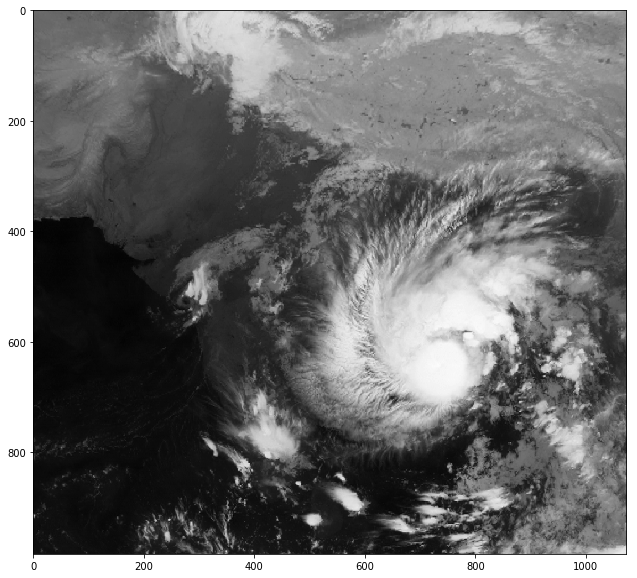

In [29]:

fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.imshow(t,cmap='gray')

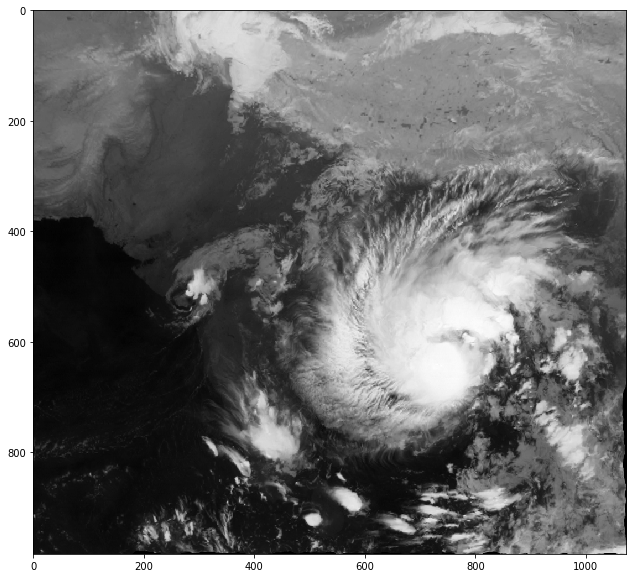

In [30]:
#im2w=cv2.imread('F:\\SIH20\\cloud\\INSAT3D_TIR1_India\\3DIMG_07NOV2019_0000_L1C_SGP.tif',-1).astype(np.float32)/255


fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.imshow(im2w,cmap='gray')

In [55]:
flow.shape

(984, 1074, 2)

In [16]:
mse=np.mean(((im2w)-(t))**2)  #now t contains last image im2w is the last image generated by warping flow b/w just previous and last

In [17]:
mse

207.01678

In [18]:
mse=np.mean(((im2w)-(im1))**2) #im1 is previous image

In [19]:
mse 

384.28897

image more close to the actual image where mse is 207 and from the previous mse is 384 pixal is in the range 0 to 255

In [24]:
# 45th image
nn='F:'+'\\'+'SIH20'+'\\'+'cloud'+'\\'+'INSAT3D_TIR1_India'+'\\'+L[44]
ff=cv2.imread(nn,-1)
ff=cv2.cvtColor(ff,cv2.COLOR_BGR2RGB)
ff=cv2.cvtColor(ff,cv2.COLOR_RGB2GRAY)
####################################### converting pixal in the range 0 to 255 #########################################  
min1=np.amin(ff)
max1=np.amax(ff)
num1=(ff-min1)*255
den1=(max1-min1)
ff=num1/den1
ff = np.asarray(ff)